## Phase 2 Project Submission

Please fill out:
* Student name: Connor Anastasio
* Student pace: self paced 
* Scheduled project review date/time: 1/10/25 @ 3:00pm
* Instructor name: Brandon Collins
* Blog post URL: https://dev.to/connoranastasio/the-birthday-paradox-a-statistical-breakdown-and-how-it-relates-to-online-security-52ac


In [1]:
#For this project we will be exploring three questions:

#Which genres are the highest rated? 
#How important is a worldwide release for revenue compared to only domestic? 
#Is there a relationship between movie length and revenue?

In [2]:

import sqlite3
import pandas as pd


In [ ]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:

from matplotlib import figure
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

### bom.movie_gross.csv

In [3]:
# Load bom.movie_gross.csv to examine the data
movie_gross_df = pd.read_csv('data/bom.movie_gross.csv')

#set max columns to none to see information on each column 

pd.set_option('display.max_columns', None)

movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
movie_gross_df['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

In [5]:
movie_gross_df['foreign_gross']

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382          NaN
3383          NaN
3384          NaN
3385          NaN
3386          NaN
Name: foreign_gross, Length: 3387, dtype: object

In [6]:
# Remove non numeric characters from the 'foreign_gross' column and convert it to numeric. Coerce errors so they are collected
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'].str.replace(',', ''), errors='coerce')

# Check for missing values in the dataset after conversion
missing_values = movie_gross_df.isnull().sum()

# Display the cleaned data and missing value counts for assessment
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [7]:
missing_values

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
# Check distribution of missing values by year to see if specific years are missing more foreign gross data
missing_foreign_by_year = movie_gross_df[movie_gross_df['foreign_gross'].isnull()].groupby('year').size()

# Display the distribution to understand any patterns in missing data by year
missing_foreign_by_year

year
2010     14
2011    106
2012    150
2013    145
2014    157
2015    259
2016    241
2017    143
2018    135
dtype: int64

<Axes: title={'center': 'Average Domestic Gross by Year'}, xlabel='Year', ylabel='Average Domestic Gross'>

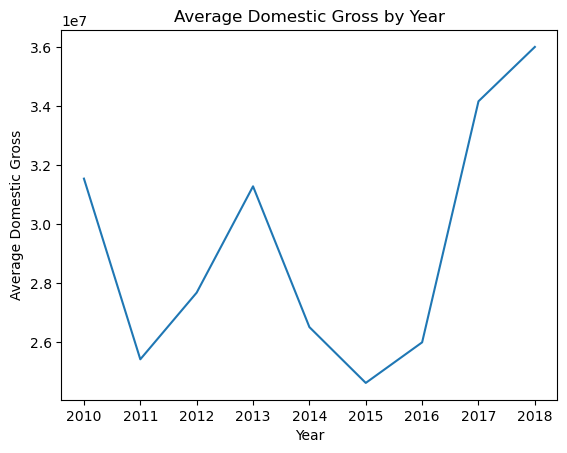

In [9]:
# Drop rows with missing 'domestic_gross' and 'studio' values to focus on more complete records for these columns
cleaned_movie_gross_df = movie_gross_df.dropna(subset=['domestic_gross', 'studio'])

# Basic exploratory analysis: calculate average domestic gross by year
avg_domestic_gross_by_year = cleaned_movie_gross_df.groupby('year')['domestic_gross'].mean()

# Display the average domestic gross per year to observe trends
avg_domestic_gross_by_year.plot(title="Average Domestic Gross by Year", xlabel="Year", ylabel="Average Domestic Gross")

In [10]:
# Fill missing 'foreign_gross' values with 0 and convert the column to numeric
cleaned_movie_gross_df['foreign_gross'] = pd.to_numeric(cleaned_movie_gross_df['foreign_gross'], errors='coerce').fillna(0)

# Verify the cleaning steps
missing_values_after = cleaned_movie_gross_df.isnull().sum()
cleaned_movie_gross_df.head(), missing_values_after

/var/folders/y4/136jbn9s52df1krsdx_9ncrm0000gn/T/ipykernel_6785/940728882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movie_gross_df['foreign_gross'] = pd.to_numeric(cleaned_movie_gross_df['foreign_gross'], errors='coerce').fillna(0)


(                                         title studio  domestic_gross  \
 0                                  Toy Story 3     BV     415000000.0   
 1                   Alice in Wonderland (2010)     BV     334200000.0   
 2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
 3                                    Inception     WB     292600000.0   
 4                          Shrek Forever After   P/DW     238700000.0   
 
    foreign_gross  year  
 0    652000000.0  2010  
 1    691300000.0  2010  
 2    664300000.0  2010  
 3    535700000.0  2010  
 4    513900000.0  2010  ,
 title             0
 studio            0
 domestic_gross    0
 foreign_gross     0
 year              0
 dtype: int64)

### Movie Ratings and Reviews

In [11]:
rt_movie = pd.read_csv('data/rt.movie_info.tsv', sep='\t')

for column in ["box_office"]:
    rt_movie[column] = rt_movie[column].str.replace('$', '').str.replace(',', '').astype(float)
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:

rt_review = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding='latin-1')

'''
The rt_review file contain reviews for movies.
'''

# Show the first few rows of the DataFrame
rt_review.head()
# rt_review.info()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [13]:
#tmdb_movies is a collection of movies with info about them. lets load it
tmdb_movies = pd.read_csv('data/tmdb.movies.csv', index_col='Unnamed: 0',)

# Show the first few rows of the DataFrame
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Movie Budgets

In [15]:
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [17]:
# Dropping release date column since it is not important for our analysis

cleaned_budgets_df = cleaned_budgets_df.drop(columns=['release_date'])
cleaned_budgets_df


# From here on out, we will replace the production_budget, domestic_gross, and worldwide_gross with integers as they 
# are currently strings. 
# We will do this to sort the values in ascending order from the least gross to the most of both domestic_gross and 
# worldwide_gross.

NameError: name 'cleaned_budgets_df' is not defined

In [ ]:
# formatting 

cleaned_budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)
cleaned_budgets_df['domestic_gross'] = cleaned_budgets_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)

cleaned_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
cleaned_budgets_df['worldwide_gross'] = cleaned_budgets_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

cleaned_budgets_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)
cleaned_budgets_df['production_budget'] = cleaned_budgets_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

# Now we will sort the values from descending order for the domestic_gross first and then the worldwide_gross
cleaned_budgets_df.sort_values('domestic_gross', ascending=False)
cleaned_budgets_df.sort_values('worldwide_gross', ascending=False)

In [ ]:
# We will then create two additional columns to include the profit from domestic and the profit from worldwide. 
# We will also order them in ascending order for both columns
cleaned_budgets_df['Profit from Domestic'] = cleaned_budgets_df['domestic_gross'] - cleaned_budgets_df['production_budget']
cleaned_budgets_df['Profit from Worldwide'] = cleaned_budgets_df['worldwide_gross'] - cleaned_budgets_df['production_budget']
cleaned_budgets_df.sort_values('Profit from Domestic', ascending=False)
cleaned_budgets_df.sort_values('Profit from Worldwide', ascending=False)

## IMDB data

The im.db dataset comprises of multiple tables containing information about movies. The tables of interest are: movie_basics and movie_ratings.

The movie_basics table includes movie titles, release year, and genres. The movie_ratings table includes average movie rating and number of votes. The
primary key for both tables is movie_id which will help in joining the two tables.

Creating a Connection to the relational database from im.db using module sqlite3

In [18]:

# Load the SQLite database to examine the tables and structure
db_path = 'data/im.db'
conn = sqlite3.connect(db_path)
curr = conn.cursor()

# Get the list of tables in the database
tables = pd.read_sql_query("""
SELECT name 
FROM sqlite_master 
WHERE type='table';""", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [ ]:

movie_basics = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_basics.head()

In [ ]:

movie_basics.describe()

In [ ]:
# Exploring the movie_ratings table from the sql data
ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings

""", conn)
#no nulls, yay
ratings_df.head()

In [ ]:

pd.set_option('display.float_format', lambda x: '%.2f' % x)



ratings_df.describe()

## Data Preparation and Cleaning
analyze which genres are the most popular. idea: more popular = more profit


### genre and ratings

In [ ]:
genres_ratings_df = pd.read_sql("""

SELECT mb.movie_id AS Movie_ID, 
mb.primary_title AS Title, 
mb.start_year AS Year, 
mb.genres AS Genre, 
mr.averagerating AS Rating, 
mr.numvotes AS Votes
    FROM movie_basics AS mb
        JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id

""", conn)

genres_ratings_df

In [ ]:

genres_ratings_df.info()

In [ ]:
genres_ratings_df['Rating'] = pd.to_numeric(genres_ratings_df['Rating'], errors='coerce')

In [ ]:
genres_ratings_df.isna().sum()

In [ ]:
#small amount of nulls, lets drop them

genres_ratings_df = genres_ratings_df.dropna(subset=['Genre'])

genres_ratings_df

In [ ]:
genres_ratings_df.isna().sum()

In [ ]:
# checking the year range, from 2010 to 2019
genres_ratings_df.groupby('Year').count()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


genres_ratings_df.describe()

In [ ]:
# there are no duplicate movie ids but possible duplicate names

genres_ratings_df.describe(include='object')

In [19]:

genres_ratings_df['Genre'] = genres_ratings_df['Genre'].str.split(',')


NameError: name 'genres_ratings_df' is not defined

In [ ]:
genres_ratings_df

In [ ]:

genres_ratings_df.loc[:, 'Genres1'] = genres_ratings_df['Genre'].apply(lambda x: x[0])
genres_ratings_df

""""
We just created a new column with first genre 
"""

In [ ]:

genres_ratings_df['Year'] = genres_ratings_df['Year'].astype(str)




In [ ]:
print(genres_ratings_df.dtypes)


In [ ]:
genres_ratings_df['Rating'] = pd.to_numeric(genres_ratings_df['Rating'], errors='coerce')

In [ ]:
#gameshow???? lets look at num of movies per genre
movies_per_genre = genres_ratings_df.groupby('Genres1')['Movie_ID'].count()
avg_rating_genre['movies_per_genre'] = movies_per_genre
avg_rating_genre

In [ ]:

avg_rating_genre2 = avg_rating_genre.loc[avg_rating_genre['movies_per_genre'] > 200].sort_values(by='Rating', ascending=False)
avg_rating_genre2

In [ ]:
# looking at rt dataset for runtime info
# rt_info_df
rt_movie

In [ ]:

run_time = rt_movie.copy()
remove_columns = ['synopsis', 'rating', 'writer', 'theater_date', 'dvd_date', 'currency', 'id', 'studio', 'director']
run_time.drop(columns=remove_columns, inplace=True)

In [ ]:

run_time.dropna(subset=['box_office'], inplace=True)
run_time.dropna(subset=['runtime'], inplace=True)
run_time

In [ ]:
# stripping minutes(unit) off from runtime column
run_time['runtime']=run_time['runtime'].str.strip(' minutes')
run_time['runtime'] = (run_time['runtime'].astype(int))
run_time

In [ ]:
# cleaning box_office values.

def cleaned_money(df, series_title):
    
    df[series_title] = df[series_title].astype(str).str.replace('$','')
    df[series_title] = df[series_title].astype(str).str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df

run_time = cleaned_money(run_time,'box_office')
display(run_time)

In [ ]:
run_time.info()

In [ ]:
run_time.info()

In [ ]:
run_time

## Results

### Recommendation 1

### Recommendation 2

### Recommendation 3

## Conclusion And Recommendations

## Next Steps
